In [1]:
from sklearn.metrics import mutual_info_score
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2
from feature_selector import FeatureSelector, discretize, conditional_mutual_information
from data_generators import DataSetGenerator, draw_function
from jmi import JMI
from mifs import MIFS
from minimax import MiniMax

In [4]:
n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)

In [5]:
y = data_2d[:, 0]

In [6]:
ds_generator = DataSetGenerator(1000, 15, 5, 5)

In [7]:
df = ds_generator.set_1()
df

,y,significant_square_0.46262,significant_abs_0.64632,significant_log_0.84888,significant_square_0.43548,significant_sqrt_0.52521,significant_sqrt_0.52521_0.70185,significant_square_0.46262_0.51846,significant_square_0.43548_0.86799,significant_square_0.43548_0.30786,significant_square_0.43548_0.86056,nsignificant_lin_11,nsignificant_log_12,nsignificant_log_13,nsignificant_square_14,nsignificant_lin_15
0,-0.279507,0.631551,0.067384,-0.930090,0.012281,0.302786,0.028023,2.310470e+00,0.370361,0.069434,0.119645,0.876982,-1.249341,-1.316340,0.141865,-0.530135
1,-0.558658,0.074703,1.782903,-0.303788,0.093879,0.194244,1.113284,-1.631779e-10,1.526588,0.545358,-0.526260,-0.675490,-1.044076,0.682274,0.919842,-1.183025
2,1.072212,1.673383,2.530675,-0.010211,0.708813,1.183363,2.287667,2.505310e+00,0.211902,0.687701,-1.007675,-0.172351,-0.218111,-1.044403,0.097235,-1.396539
3,0.616315,0.205396,0.097003,-0.661296,0.008840,0.524179,0.170442,-3.313228e-02,1.390841,0.244847,-0.777524,0.722824,-0.100522,-0.011430,1.141733,-0.491498
4,0.547835,0.108124,1.135878,0.184626,0.278764,0.105901,1.294642,4.522916e-01,0.360480,0.632129,0.892012,0.424177,0.812834,-0.451432,0.026198,-0.481666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.620374,0.016320,0.713748,-0.956469,0.215628,1.078184,0.975679,-2.285282e-01,1.208161,0.292585,-4.409053,0.377591,-1.279616,-0.720835,0.003050,-0.567726
996,0.559512,0.846667,0.752722,0.022245,0.190353,0.298540,0.099682,3.142505e+00,0.112874,0.027990,-0.753324,-1.266426,-0.155704,-0.705238,0.239078,-1.627446
997,1.116099,2.030691,1.095754,0.309309,0.742894,1.456065,0.803218,7.735109e+00,0.689280,1.634257,0.043777,1.567998,-1.291701,0.691892,2.064464,-0.191506
998,0.145390,0.380727,0.916303,-3.971053,0.000467,0.662970,6.661641,3.449833e-05,0.789937,0.334131,-0.855853,-0.619766,-0.187782,-0.106502,0.017352,-0.186456


In [13]:
from sklearn.linear_model import LassoCV

df2 = df.to_numpy()
#X, y = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=2, random_state=0).fit(X, y)
X = df2[:,1:]
y = df2[:,0]
reg.score(X, y)

NameError: name 'X' is not defined

In [8]:
jmi = JMI(df)
jmi.run_fs()
jmi.numeric_criterium_path

[0.3277392491338906,
 0.11613102678534812,
 0.12221473009245298,
 0.10973772187188868,
 0.048540832033248826,
 0.04647736662853143,
 0.042508498344607404,
 0.014532318646184185,
 0.016454528932013657,
 0.008228317782537485,
 0.007634579824394271,
 0.007275346476050094,
 0.0027296648385554782,
 -0.0005784773725095935,
 -0.0016715836195572327]

In [9]:
mifs = MIFS(df)
mifs.run_fs()
mifs.numeric_criterium_path

[0.3277392491338906,
 0.11613102678534812,
 -0.0015164666451274317,
 -0.03339142388584923,
 -0.059722905342718575,
 -0.09082190948084375,
 -0.12879564287312667,
 -0.14508183058516302,
 -0.18015432788078029,
 -0.24923816899221563,
 -0.3677485382710276,
 -0.6104379068453996,
 -0.814895441213439,
 -1.1042419762609417,
 -1.9251898350011734]

In [15]:
mm = MiniMax(df)
mm.run_fs()
mm.numeric_criterium_path

[0.30734475596441013,
 0.21292349159726165,
 0.17997463978829314,
 0.16663362236746396,
 0.1349236018541914,
 0.07156645398863411,
 0.05615136328801425,
 0.05377088442721817,
 0.0488552292661371,
 0.034764931670774546,
 0.03372198602255359,
 0.027194002582199037,
 0.017615954292745394,
 0.016821009752295876,
 0.009707515150033015]

In [24]:
features = mm.features
features

Index(['significant_sqrt_0.57058', 'significant_cube_0.72046',
       'significant_log_0.66093', 'significant_cube_0.52792',
       'significant_cube_0.87171', 'nsignificant_sqrt_11',
       'nsignificant_log_14', 'significant_log_0.66093_0.55993',
       'nsignificant_abs_15', 'nsignificant_square_12',
       'nsignificant_square_13', 'significant_cube_0.87171_0.63878',
       'significant_log_0.66093_0.65214', 'significant_cube_0.87171_0.52455',
       'significant_log_0.66093_0.77339'],
      dtype='object')

In [25]:
jmi.numeric_criterium_path

[0.30734475596441013,
 0.16029956792768418,
 0.13682588045171612,
 0.1344962058681813,
 0.12240133576891699,
 0.013949177040694032,
 0.009011264829407829,
 0.014751178500440013,
 0.008834821729225936,
 0.006800276500199223,
 0.005507363859305642,
 0.002555878855553636,
 0.001292897505979121,
 -0.007266915195250297,
 -0.016164147754052678]

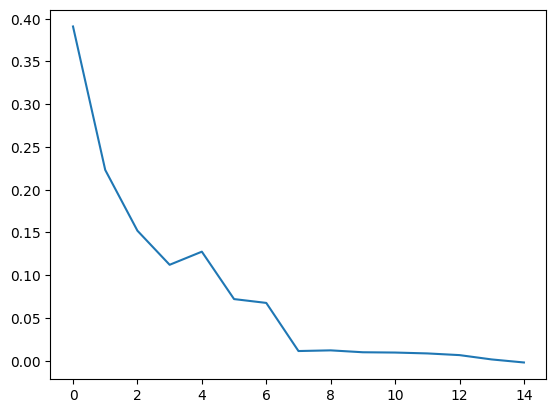

In [58]:
plt.plot(list(range(len(jmi.numeric_criterium_path))), jmi.numeric_criterium_path)

In [130]:
from sklearn import linear_model

In [196]:
clf = linear_model.Lasso(alpha=0.6)
X = df2[:,1:]
y = df2[:,0]
clf.fit(X, y)
clf.score(X, y)

0.5437996649908805

In [197]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=10, random_state=0, max_iter=10000)

# Fit model
model.fit(X, Y)

LassoCV(cv=10, max_iter=10000, random_state=0)